# Solve PD-set of small trees and show pictures

Original tree of order 30.


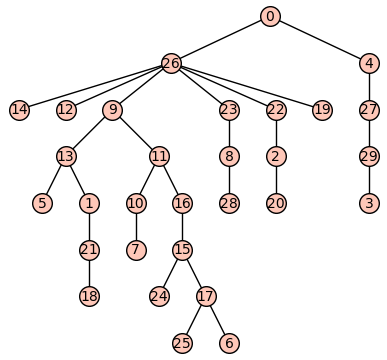

PD-Dominated tree:


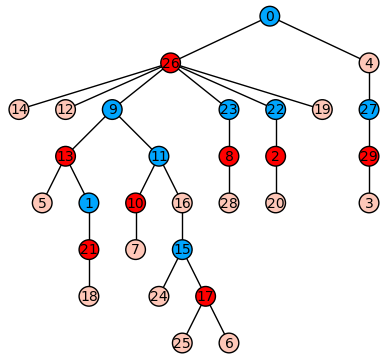

PD-Number is 16.


In [2]:
import numpy
import collections
n = 30
# Generate a random tree with n vertices
T = graphs.RandomTree(n) # For a given tree, enter tree data as dictionary here
print(f"Original tree of order {n:.0f}.")
T.graphplot(layout='tree',tree_root=0).show()

# BFS setup using deque for efficient popping
queue = collections.deque([0])
parent = {0: None}
order = []

while queue:
    v = queue.popleft()
    order.append(v)
    for child in T[v]:
        if child not in parent:  # Ensure we don't revisit the parent
            parent[child] = v
            queue.append(child)


# Initialise marking dictionary
B = collections.defaultdict(lambda: [0, 0])  # Create boolean for [In_PD, Dom_by_Child] 

# Process nodes from leaves to root
for l in reversed(order[1:]):  # Ingnore root 0
    p = parent[l]  # always exists, p is never none could be 0
    gp = parent[p] if p is not None else None # possible gp is None

    if B[l][1] == 0 and B[p][0] == 0 and p!=0 and B[gp][0]==0:
        B[p][0] = B[gp][0] = B[gp][1] = 1
        if gp!=0:
            B[parent[gp]][1] = 1

    elif B[l][1] == 0 and B[p][0] == 0 and (p==0 or B[gp][0]==1):
        B[l][0] = B[p][0] = B[p][1] = 1
        if p!=0:
            B[gp][1] = 1

# Ensure root is dominated
if B[0][1] == 0:
    B[0][0] = B[order[1]][0] = B[0][1] = 1


#Pairing 
DcR=[] 
DcP=[]
for k in reversed(order[1:]): # 0 will be counted if since we add parent
    if B[k][0]==1 and ((k not in DcP) and (k not in DcR)):
        DcR.append(k)
        DcP.append(parent[k])
    #This simple algo should give pairing since we are already guaranteed a PD set


col={'#00a6ff':DcP, '#ff0000':DcR}
t=Graph(T)
print("PD-Dominated tree:")
t.graphplot(layout='tree',tree_root=0,vertex_colors=col).show()
PD=len(DcR)+len(DcP)
print(f"PD-Number is {PD:.0f}.")    